# Class

## EXERCISE 1

* Ex1: Change value of m. Currently is m=2
* Ex2: Compare results against interpolation -> Overlay plots to ease the comparison. Compute a plot to see the error

## EXERCISE 2

From $(x_i, y_i) \rightarrow f(x)=a_0+a_1x+a_2x^2$.

Asume Gaussian noise $\epsilon_i=N(0, \sigma^2)$. Now, get:

$(x_i, y^{~}_{i}=y_i+\epsilon_i) \rightarrow f^{~}(x)=a^{~}_0+a^{~}_1x+a^{~}_2x^2$.

Compute also:

$E_{x}[a^{~}_i], V_{x}[a^{~}_i]$ (from several iterations)

_Hint:_

* Use numpy functions to get the noise
* Use numpy functions to get expected values and variances.
* Consider $\sigma \approx [1,1000]$

# Least squared

In [14]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

def least_squares_coeff(x, y, m):
    '''
        Least squares coefficient calculator
        It takes the polynomial degree m 
        For linear: m = 2
        x and y are the input and the measured output respectively
    '''
    assert len(x) is len(y)
    n = len(x)
    # Create inner content
    B_inner = [ones(n), x]
    for m in range(2,m + 1):
        B_inner.append(x**m)
    # Create the numpy matrix and transpose
    B = matrix(B_inner).T
    BT = B.T

    y_exact = matrix(y).T

    a = linalg.solve(BT*B, BT*y_exact)
    return a

def least_squares_compute(x, a):
    assert len(a) >= 2
    result = float(a[0])
    for i in range(1,len(a)):
        result += float(a[i]*x**i)
    return result

# Least squares
a = least_squares_coeff(year, population, 2)
print("Least Squares (1945):", least_squares_compute(1945, a))
print("Least Squares (1975):", least_squares_compute(1975, a))
print("Least Squares (2020):", least_squares_compute(2020, a))

Least Squares (1945): 4745.087199790636
Least Squares (1975): 6051.288177001872
Least Squares (2020): 8521.523173396941


# Interpolation

In [28]:
def generate_lagrange_basis(q, e):
    """
    q: array of interpolation points. I already know the function
    e: array of evaluation points. I would like to get the values of the function
    """
    assert len(q.shape) == 1
    assert len(e.shape) == 1
    
    n_evaluation_points = e.shape[0]
    n_interpolation_points = q.shape[0]
    
    basis = np.ones((n_evaluation_points, n_interpolation_points), dtype=float64)
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            for k in range(n_interpolation_points):
            # Evaluation of the polinomial
                if j == k:
                    # Avoid zero div
                    continue
                basis[i,j] *= ((e[i]-q[k])/(q[j]-q[k]))
    return basis

def interpolate_function(f,q,e):
    """
    f: function to interpolate
    q: known points
    e: evaluation to recreate the function
    """
    basis = generate_lagrange_basis(q,e)
    
    n_evaluation_points = e.shape[0]
    n_interpolation_points = q.shape[0]
    
    y = np.zeros((n_evaluation_points,1))
    
    # We want to apply evaluation's linearity 
    # eval(1,3,6) = eval(1,0,0)+3eval(0,1,0)+6eval(0,0,1)
    # We have them in the basis
    # 1,3,6 are q_i
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            y[i] += f[j] * basis[i,j]
    return y


# --- Test ---
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

# Evaluation points
evaluation_points = array([1945, 1975, 2020])
y_interpolated = interpolate_function(population, year, array(evaluation_points))

for i in range(len(evaluation_points)):
    print("Interpolation (" + str(evaluation_points[i]) + "): ", float(y_interpolated[i]))
    


Interpolation (1945):  4451.093999054897
Interpolation (1975):  6422.567103351185
Interpolation (2020):  245590.55755220907


# Exercise 1: Solution

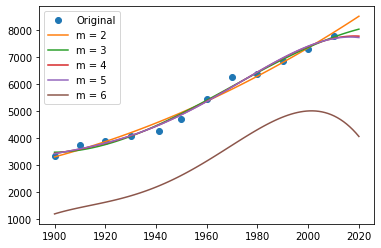

In [52]:
evaluation_points = linspace(1900,2020,100)
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

y_interpolated = interpolate_function(population, year, array(evaluation_points))

def evaluate_least_squares(evaluation_points, year, population, m):
    a_m = least_squares_coeff(year, population, m)
    y_ls = []
    for i in range(len(evaluation_points)):
        y_ls.append(least_squares_compute(evaluation_points[i], a_m))
    return y_ls


plot(year, population, 'o')
#plot(evaluation_points, y_interpolated)
legends = ["Original"]
for i in range(2, 7, 1):
    y_ls = evaluate_least_squares(evaluation_points, year, population, i)
    plot(evaluation_points, y_ls)
    legends.append("m = " + str(i))
legend(legends)

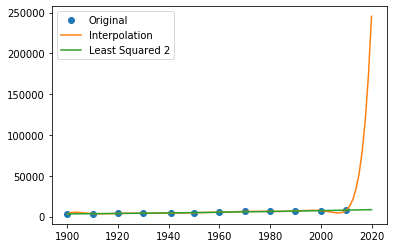

In [58]:
# Compared to Interpolation
plot(year, population, 'o')
plot(evaluation_points, y_interpolated)
plot(evaluation_points, evaluate_least_squares(evaluation_points, year, population, 2))
legend(["Original", "Interpolation", "Least Squared 2"])

In [55]:
# Least squares order from 6 goes out of control!
# Interpolation goes off of scope!

# Exercise 2: Solution

Clean:  [ 1.51387713e-01 -5.49899801e+02  5.01596699e+05]
Noisy:  [ 1.51387713e-01 -5.49899801e+02  5.01600121e+05]


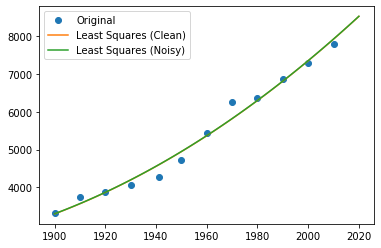

In [78]:
evaluation_points = linspace(1900,2020,100)
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

# Regression - Clean
p_2 = polyfit(year, population, 2) # Degree 2
y_ls_2_clean = polyval(p_2, evaluation_points)

# Regression - Dirty
noise = random.normal(0, 200)
noisy_population = population + noise
p_2_noisy = polyfit(year, noisy_population, 2) # Degree 2
y_ls_2_noisy = polyval(p_2_noisy, evaluation_points)

plot(year, population, 'o')
plot(evaluation_points, y_ls_2_clean)
plot(evaluation_points, y_ls_2_noisy)
legend(["Original", "Least Squares (Clean)", "Least Squares (Noisy)"])

print("Clean: ", p_2)
print("Noisy: ", p_2_noisy)

E(a_i):  [0.15138771275282792, -549.8998014175392, 501523.9740988504]
V(a_i):  [4.496661234155318e-32, 6.7234274164075785e-25, 242061.12339633307]


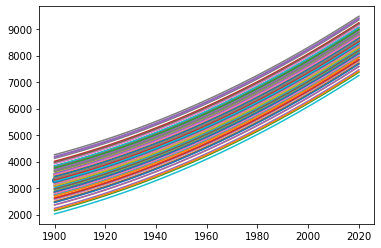

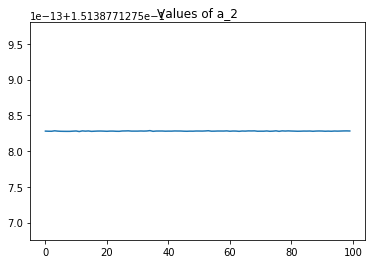

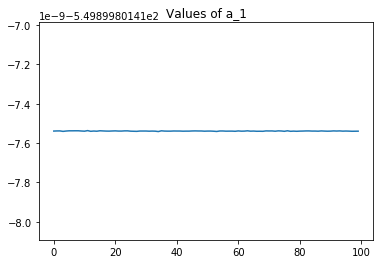

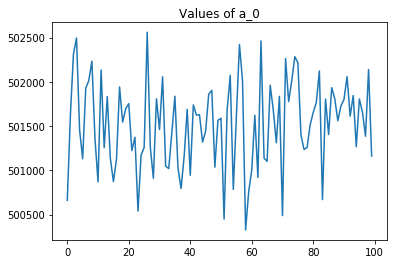

In [92]:
evaluation_points = linspace(1900,2020,100)
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

# Now, expected and variance
ITERATIONS = 100
DEGREE = 2
a = []
for i in range(DEGREE + 1):
    a.append([])

figure(DEGREE+2)
plot(year, population, 'o')
for i in range(ITERATIONS):
    noise = random.normal(0, 500)
    noisy_population = population + noise
    p_2_noisy = polyfit(year, noisy_population, DEGREE) # Degree 2
    plot(evaluation_points, polyval(p_2_noisy, evaluation_points))
    for i in range(DEGREE + 1):
        a[i].append(p_2_noisy[i])

means = []
variance = []
legends = []
for i in range(DEGREE + 1):
    means.append(mean(a[i]))
    variance.append(var(a[i]))
    figure(i)
    plot(a[i])
    title("Values of a_" + str(DEGREE-i))

print("E(a_i): ", means)
print("V(a_i): ", variance)